In [53]:
import json
import os
from typing import List, Dict

import matplotlib.pyplot as plt

model_ids: List[str] = [
     'LinearRegression2021_12_23_11_28_53_508295',
'Informer2021_12_23_11_23_15_246924',
     'TimeSeriesTransformerWithConvolutionalAttention2021_12_23_10_36_42_327812',
   # 'SimpleNeuralNet2021_12_02_11_51_54_168646',
    # 'SimpleNeuralNet2021_12_02_11_11_55_435483',
    # 'LinearRegression2021_12_02_12_25_39_613388'
]
labels = [
        'Linear Regression',
'Informer2021_12_23_11_23_15_246924',

         'TimeSeriesTransformerWithConvolutionalAttention2021_12_23_10_36_42_327812',

    # 'NeuralNet (1 Layer)',
    # 'NeuralNet (2 Layers)',
    # 'Linear Regression'
]
assert len(model_ids) == len(labels)

experiments = []
for model_id in model_ids:
    with open(os.path.join('..', 'experiments', 'archive', model_id + '.json')) as file:
        experiment_data = json.load(file)
        experiments.append(experiment_data)
        print(experiment_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [54]:
class ModelComparison:

    def __init__(self, date_of_comparison):
        self.date_of_comparison = date_of_comparison
        self.expected = None
        self.model_predictions: Dict[str, List[float]] = dict()

    def add_model_predictions(self, experiment_id: str, predictions: List[float]):
        self.model_predictions[experiment_id] = predictions

    def serialize(self):
        return self.__dict__


date_to_model_comparison: Dict[str, ModelComparison] = dict()
for experiment in experiments:
    ex_id = experiment['experimentName']
    experiment_results_per_hour = experiment['evaluation']['expected_predicted_comparison']
    for hourly_results in experiment_results_per_hour:
        date = hourly_results['date']
        if not date in date_to_model_comparison:
            date_to_model_comparison[date] = ModelComparison(date)
        date_to_model_comparison[date].add_model_predictions(ex_id, hourly_results['predicted'])
        date_to_model_comparison[date].expected = hourly_results['expected']

In [55]:
print(date_to_model_comparison)


def save_as_file():
    result = {
        'model_ids': model_ids,
        'elements': [comparison.serialize() for comparison in date_to_model_comparison.values()]
    }

    file_path = os.path.join('comparison.json')

    with open(file_path, 'w') as fp:
        json.dump(result, fp)
        fp.close()


save_as_file()

{'2018-01-08 00:00:00+00:00': <__main__.ModelComparison object at 0x000001ECC2724FA0>, '2018-01-08 01:00:00+00:00': <__main__.ModelComparison object at 0x000001ECC2724F40>, '2018-01-08 02:00:00+00:00': <__main__.ModelComparison object at 0x000001ECC2724880>, '2018-01-08 03:00:00+00:00': <__main__.ModelComparison object at 0x000001ECC2724C10>, '2018-01-08 04:00:00+00:00': <__main__.ModelComparison object at 0x000001ECC2724E80>, '2018-01-08 05:00:00+00:00': <__main__.ModelComparison object at 0x000001ECC2724E50>, '2018-01-08 06:00:00+00:00': <__main__.ModelComparison object at 0x000001ECC2724AF0>, '2018-01-08 07:00:00+00:00': <__main__.ModelComparison object at 0x000001ECC2724D90>, '2018-01-08 08:00:00+00:00': <__main__.ModelComparison object at 0x000001ECC2724D30>, '2018-01-08 09:00:00+00:00': <__main__.ModelComparison object at 0x000001ECC2724D00>, '2018-01-08 10:00:00+00:00': <__main__.ModelComparison object at 0x000001ECC2724C40>, '2018-01-08 11:00:00+00:00': <__main__.ModelCompariso

3 8496
[[6784.23876953125, 6452.65673828125, 6034.216796875, 5869.3369140625, 5874.033203125, 6117.8291015625, 6598.48193359375, 7443.7705078125, 8365.603515625, 8895.9248046875, 9240.580078125, 9420.08984375, 9487.677734375, 9537.19140625, 9380.3798828125, 9220.39453125, 9074.0927734375, 8895.330078125, 9125.380859375, 9103.990234375, 8948.05078125, 8477.041015625, 7998.18115234375, 7745.8740234375, 7178.49560546875, 6654.0517578125, 6249.0009765625, 6094.28759765625, 6085.22705078125, 6285.80126953125, 6659.90185546875, 7396.4453125, 8309.189453125, 8758.125, 8953.9287109375, 9146.181640625, 9132.9384765625, 9266.8916015625, 9192.2333984375, 9048.9169921875, 8867.2607421875, 8777.2578125, 9065.0146484375, 9084.94921875, 8912.568359375, 8438.884765625, 8012.513671875, 7747.53369140625, 7200.7861328125, 6643.59326171875, 6177.46240234375, 5951.67919921875, 5990.2802734375, 6141.63671875, 6488.3515625, 7263.6259765625, 8166.349609375, 8638.6376953125, 8652.26953125, 8784.46875, 8806.506

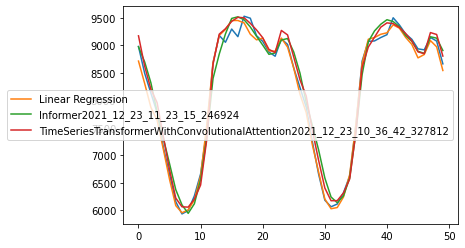

In [56]:
def plot_comparison_by_prediction_horizon(prediction_horizon_length: int, start_index: int, window_size: int):
    l = sorted(date_to_model_comparison.values(), key=lambda c: c.date_of_comparison)
    expected = [e.expected[prediction_horizon_length] for e in l]
    plt.plot(expected[start_index:start_index + window_size])

    predictions = [[] for _ in range(0, len(experiments))]
    for e in l:
        for i, p in enumerate(model_ids):
            predictions[i].append(e.model_predictions[p][prediction_horizon_length])
    for i, p in enumerate(predictions):
        plt.plot(p[start_index:start_index + window_size], label=labels[i])
    print(len(predictions), len(predictions[0]))
    print(predictions)
    plt.legend()
    plt.show()


plot_comparison_by_prediction_horizon(22, 500, 50)